In [226]:
import numpy as np
import matplotlib.pyplot as plt
data=np.random.randn(15000,2)

In [227]:
data2=(25./100.)*np.random.randn(45000,2)

In [228]:
circle=np.matrix([[x[0],x[1]] for x in data if (np.sqrt(x[0]**2+x[1]**2)>1.50)])

In [229]:
circle2=np.matrix(data2)

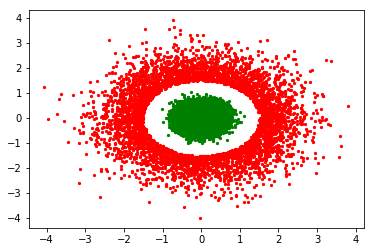

In [230]:
plt.scatter([circle[:,0]], [circle[:,1]], s=5, color="red")
plt.scatter([circle2[:,0]], [circle2[:,1]], s=5, color="green")

In [231]:
data2=np.hstack((data2,np.zeros((data2.shape[0],1))))
data=np.hstack((data,np.ones((data.shape[0],1))))

In [232]:
data.shape

(15000, 3)

In [233]:
all_data=np.vstack((data,data2))

In [234]:
min(y_train)

matrix([[0.]])

In [235]:
np.random.shuffle(all_data)

In [236]:
X_train=all_data[:,:-1]
y_train=np.matrix(all_data[:,-1]).reshape((X_train.shape[0],1))

In [237]:
def norm(X,X_tr):
    X_tr_min=X_tr.min(0)
    X_tr_max=X_tr.max(0)
    X=(X-X_tr_min)/(X_tr_max-X_tr_min)
    return(X)

In [238]:
X0=X_train


In [239]:
# x_val=all_data[27000:30000,:-1]
# y_val=all_data[27000:30000,-1]
# x_test=all_data[27000:30000,:-1]
# y_test=all_data[27000:30000,-1]

In [240]:
def phi(X):
    X_phi=np.hstack((np.ones((X.shape[0],1)),np.sqrt(X[:,0]**2+X[:,1]**2).reshape(X.shape[0],1)))
    return X_phi

In [241]:
DM

array([[1.        , 0.68520498],
       [1.        , 0.59459396],
       [1.        , 0.70719619],
       ...,
       [1.        , 0.68803596],
       [1.        , 0.87671126],
       [1.        , 0.65948222]])

In [242]:
DM=phi(X_train)

In [243]:
def cost(y,p):
    for j in range(y.shape[0]):
        Err=[]
        if y[j,0]==1:
            Err.append(-np.log(p[j]))
        else:
            Err.append(-np.log(1-p[j]))
    return np.sum(Err)

In [244]:
w=np.random.randn(X_train.shape[1],1)
epochs=50
eta=.00001
Error=[]
epoch=[]
err_min=1000000

In [245]:
#Has a hight tendency to overshoot the min
for i in range(epochs):
    p=1/(1+np.exp(-DM@w))
    err=cost(y_train,p)    
    Error.append(err)
    epoch.append(i)
    w=w-eta*DM.T@(p-y_train)

    if err<err_min:
        err_min=err
        w_best=w

In [246]:
y_pred=np.rint(p)

In [247]:
np.mean(y_train==y_pred)

0.90185

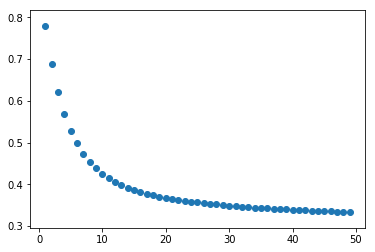

In [248]:
plt.scatter(np.array(epoch[1:]).reshape(epochs-1,1),Error[1:])

In [265]:
X1=np.linspace(-1,1,2000).reshape(-1,1).T

In [266]:
w_best

matrix([[-2.32947741],
        [ 2.31895614]])

In [267]:
#Solve for decision boundary. Only non-imaginary if x1,x2 both on decision boundary in real space (should be circular)
a=1

In [268]:
b=0

In [269]:
c=((w[0]/w[1])**2-X1**2)

In [270]:
sqrt_term=np.power(b,2)-4*a*c

In [271]:
X2_1=c
X2_2=-c

In [272]:
def unnorm(X,X_tr):
    X_tr_min=X_tr.min(0)
    X_tr_max=X_tr.max(0)
    X=X*(X_tr_max-X_tr_min)+X_tr_min
    return(X)

In [273]:
X1_unnorm=unnorm(X1.T,X0[:,0]).T
X2_1_unnorm=unnorm(X2_1.T,X0[:,1]).T
X2_2_unnorm=unnorm(X2_2.T,X0[:,1]).T

In [274]:
rows, cols=np.where(y_train[:,0]==0)
rows2,cols2=np.where(y_train[:,0]==1)
X_zeros=X_train[rows,:]
X_ones=X_train[rows2,:]

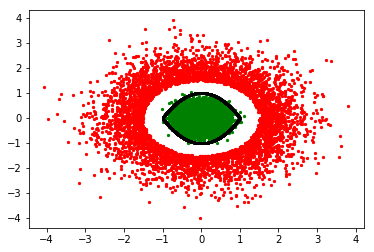

In [275]:
#Circle is actually smaller, but looks terrible, as it bisects the green section
plt.scatter([circle[:,0]], [circle[:,1]], s=5, color="red")
plt.scatter([circle2[:,0]], [circle2[:,1]], s=5, color="green")
plt.scatter([X1[0,:]],[X2_1[0,:]], s=2, color="black")
plt.scatter([X1[0,:]],[X2_2[0,:]], s=2, color="black")

In [276]:
len(X_zeros)

45000

In [ ]:
len(X_ones)

In [149]:
w

matrix([[-1.14950504],
        [-1.81296061],
        [-2.10673166],
        [ 3.60715829]])